In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import os
from qvalue import estimate
from glob import iglob

/Users/mikesivley/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Load the ExAC nsSNV results
ns  = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-27/exac/daf_K_summary.txt",delimiter='\t')
ns  = ns.drop_duplicates(["structid","chain"])
ns.ix[~ns[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(ns.ix[~ns[ "Kp"].isnull(), "Kp"].values)
ns.ix[~ns["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(ns.ix[~ns["wKp"].isnull(),"wKp"].values)

In [4]:
# Load the ExAC sSNV results
syn = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-27/synonymous/daf_K_summary.txt",delimiter='\t')
syn = syn.drop_duplicates(["structid","chain"])
syn.ix[~syn[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(syn.ix[~syn[ "Kp"].isnull(), "Kp"].values)
syn.ix[~syn["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(syn.ix[~syn["wKp"].isnull(),"wKp"].values)

In [5]:
# Load the ClinVar pathogenic results
cv  = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-06/clinvar/pathogenic_K_summary.txt",delimiter='\t')
cv  = cv.drop_duplicates(["structid","chain"])
cv.ix[~cv[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(cv.ix[~cv[ "Kp"].isnull(), "Kp"].values)

In [6]:
# Load the COSMIC somatic results
csm = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-17/cosmic/recurrence_K_summary.txt",delimiter='\t')
csm = csm.drop_duplicates(["structid","chain"])
csm.ix[~csm[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(csm.ix[~csm[ "Kp"].isnull(), "Kp"].values)
csm.ix[~csm["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(csm.ix[~csm["wKp"].isnull(),"wKp"].values)

In [7]:
def prep_split(dfx):
    df  = dfx.copy()
    df['fdr']  = 'All (N=%4d)'%len(df)
    dft = dfx[dfx["Kq"]<0.1].copy()
    dft['fdr'] = 'FDR < 0.1 (N=%4d)'%len(dft)
    df = pd.concat((df,dft)).dropna(subset=["Kz"])
    df['dummy'] = ''
    return df

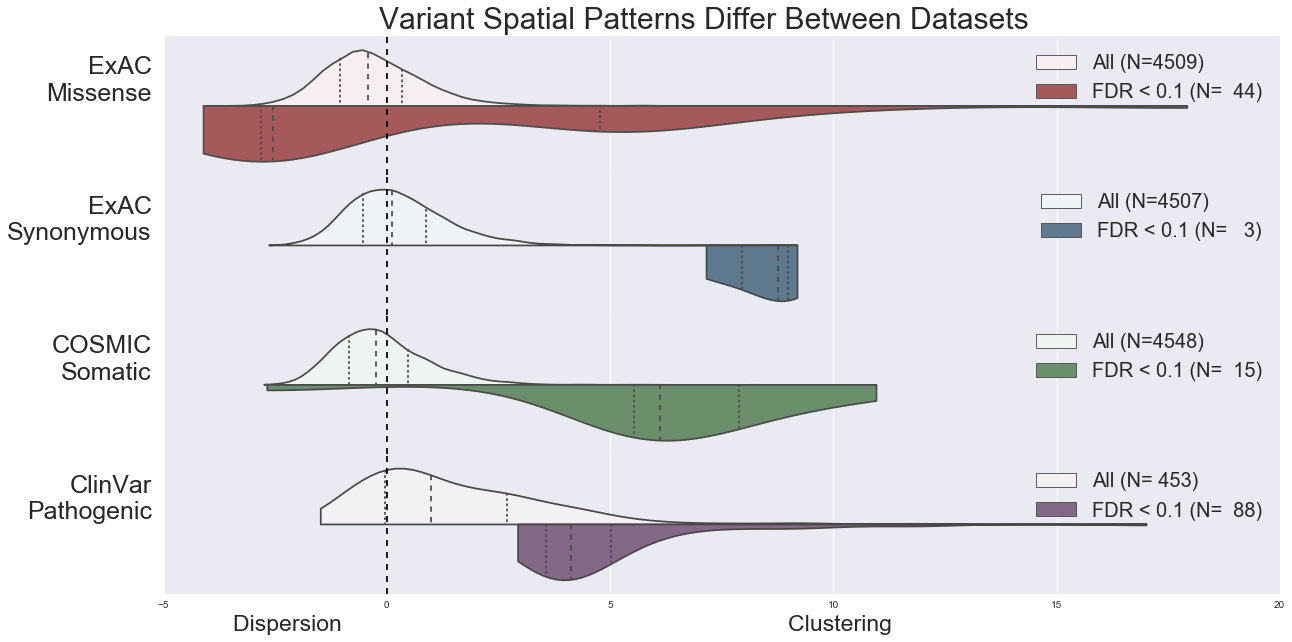

In [8]:
# Setup the plot
fig,ax = plt.subplots(4,1,figsize=(20,10),sharex=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=4, desat=.5))

# Plot the FDR-significant K for ExAC nsSNVs
df = prep_split(ns)
sns.violinplot(x='Kz',y='dummy',hue='fdr',data=df,inner='quart',color=pal[0],split=True,scale='width',cut=0,ax=ax[0])
df.ix[df['fdr']!='FDR < 0.1','Kz'] = np.nan
sns.stripplot(x='Kz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[0],orient='h',split=True,edgecolor='white',size=10,lw=2,ax=ax[0])
ax[0].set_ylabel("ExAC\nMissense",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ExAC sSNVs
df = prep_split(syn)
tdf = df.copy()
tdf.ix[tdf['fdr']=='FDR < 0.1','Kz'] = np.nan
sns.violinplot(x='Kz',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[1],split=True,scale='width',cut=0,ax=ax[1])
df.ix[df['fdr']!='FDR < 0.1','Kz'] = np.nan
sns.stripplot(x='Kz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[1],orient='h',split=True,edgecolor='white',size=10,lw=2,ax=ax[1])
ax[1].set_ylabel("ExAC\nSynonymous",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for COSMIC somatic nsSNVs
df = prep_split(csm)
sns.violinplot(x='Kz',y='dummy',hue='fdr',data=df,inner='quart',color=pal[2],split=True,scale='width',cut=0,ax=ax[2])
df.ix[df['fdr']!='FDR < 0.1','Kz'] = np.nan
sns.stripplot(x='Kz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[2],orient='h',split=True,edgecolor='white',size=10,lw=2,ax=ax[2])
ax[2].set_ylabel("COSMIC\nSomatic",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ClinVar pathogenic nsSNVs
df = prep_split(cv)
sns.violinplot(x='Kz',y='dummy',hue='fdr',data=df,inner='quart',color=pal[3],split=True,scale='width',cut=0,ax=ax[3])
df.ix[df['fdr']!='FDR < 0.1','Kz'] = np.nan
sns.stripplot(x='Kz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[3],orient='h',split=True,edgecolor='white',size=10,lw=2,ax=ax[3])
ax[3].set_ylabel("ClinVar\nPathogenic",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[3].get_legend_handles_labels()
ax[3].legend(fontsize=20,handles=handles[:2])

plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Dispersion%sClustering%s"%(' '*70,' '*50),fontsize=23)
for x in ax:
    x.axvline(x=0,c='black',ls='dashed')
plt.xlim([-5,20])
plt.suptitle("Variant Spatial Patterns Differ Between Datasets",fontsize=30,y=0.94)
plt.show()

In [9]:
from scipy.stats import mannwhitneyu
print "Mann-Whitney U Comparisons"
u,p = mannwhitneyu(ns["Kz"],syn["Kz"])
print "Nonsynonymous-Synonymous:  p = %4.2g"%p
u,p = mannwhitneyu(ns["Kz"],csm["Kz"])
print "Nonsynonymous-COSMIC:      p = %4.2g"%p
u,p = mannwhitneyu(csm["Kz"],cv["Kz"])
print "Nonsynonymous-ClinVar:     p = %4.2g"%p
u,p = mannwhitneyu(csm["Kz"],cv["Kz"])
print "COSMIC-ClinVar:            p = %4.2g"%p

Mann-Whitney U Comparisons
Nonsynonymous-Synonymous:  p = 2.8e-121
Nonsynonymous-COSMIC:      p = 1.8e-17
Nonsynonymous-ClinVar:     p = 4.8e-74
COSMIC-ClinVar:            p = 4.8e-74


In [13]:
from scipy.stats import f_oneway
print "ANOVAs"
u,p = f_oneway(ns.ix[~ns["Kz"].isnull(),"Kz"],syn.ix[~syn["Kz"].isnull(),"Kz"])
print "Nonsynonymous-Synonymous:  p = %4.2g"%p
u,p = f_oneway(ns.ix[~ns["Kz"].isnull(),"Kz"],csm.ix[~csm["Kz"].isnull(),"Kz"])
print "Nonsynonymous-COSMIC:      p = %4.2g"%p
u,p = f_oneway(csm["Kz"],cv["Kz"])
print "Nonsynonymous-ClinVar:     p = %4.2g"%p
u,p = f_oneway(csm["Kz"],cv["Kz"])
print "COSMIC-ClinVar:            p = %4.2g"%p

ANOVAs
Nonsynonymous-Synonymous:  p = 1.4e-106
Nonsynonymous-COSMIC:      p = 1.2e-15
Nonsynonymous-ClinVar:     p = 2e-143
COSMIC-ClinVar:            p = 2e-143


In [11]:
def prep_split(dfx):
    df  = dfx.copy()
    df['fdr']  = 'All (N=%4d)'%len(df)
    dft = dfx[dfx["wKq"]<0.1].copy()
    dft['fdr'] = 'FDR < 0.1'
    df = pd.concat((df,dft)).dropna(subset=["wKz"])
    df['dummy'] = ''
    return df

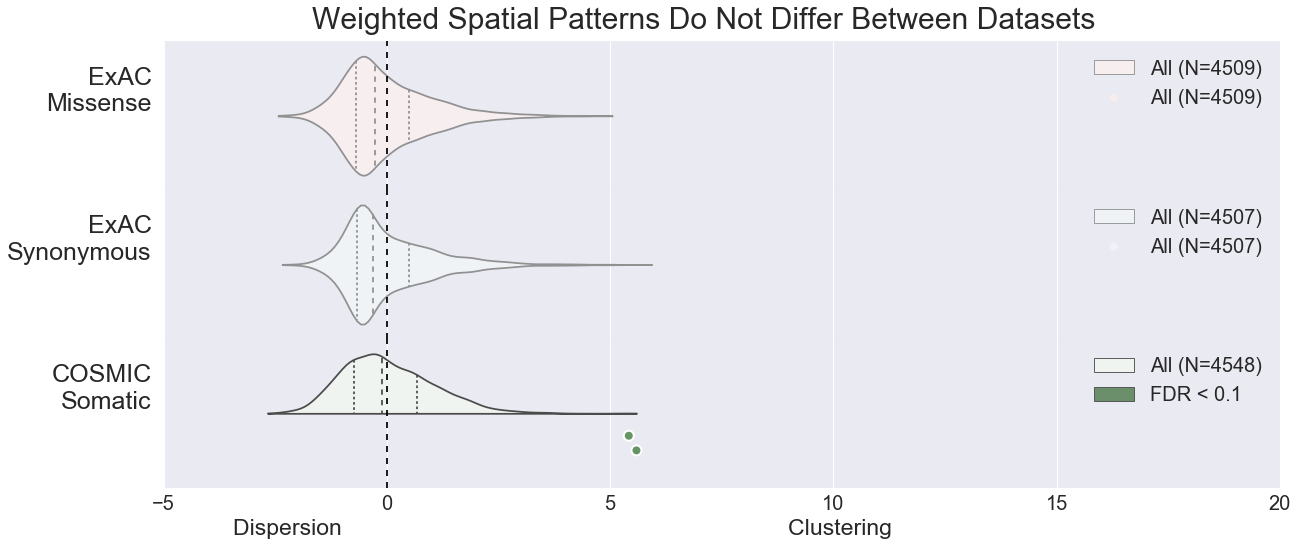

In [12]:
# Setup the plot
fig,ax = plt.subplots(3,1,figsize=(20,8),sharex=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=3, desat=.5))

# Plot the FDR-significant wK for ExAC nsSNVs
df = prep_split(ns)
split = (df["wKq"]<0.1).sum()>0
sns.violinplot(x='wKz',y='dummy',hue='fdr',data=df,inner='quart',color=pal[0],split=split,scale='width',cut=0,ax=ax[0])
df.ix[df['fdr']!='FDR < 0.1','wKz'] = np.nan
sns.stripplot(x='wKz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[0],orient='h',split=True,edgecolor='white',size=10,lw=2,ax=ax[0])
ax[0].set_ylabel("ExAC\nMissense",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant wK for ExAC sSNVs
df = prep_split(syn)
split = (df["wKq"]<0.1).sum()>0
sns.violinplot(x='wKz',y='dummy',hue='fdr',data=df,inner='quart',color=pal[1],split=split,scale='width',cut=0,ax=ax[1])
df.ix[df['fdr']!='FDR < 0.1','wKz'] = np.nan
sns.stripplot(x='wKz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[1],orient='h',split=True,edgecolor='white',size=10,lw=2,ax=ax[1])
ax[1].set_ylabel("ExAC\nSynonymous",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant wK for COSMIC somatic nsSNVs
df = prep_split(csm)
tdf = df.copy()
tdf.ix[tdf['fdr']=='FDR < 0.1','wKz'] = np.nan
split = (df["wKq"]<0.1).sum()>0
sns.violinplot(x='wKz',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[2],split=split,scale='width',cut=0,ax=ax[2])
df.ix[df['fdr']!='FDR < 0.1','wKz'] = np.nan
sns.stripplot(x='wKz',y='dummy',hue='fdr',data=df,jitter=True,linewidth=1,color=pal[2],orient='h',split=True,edgecolor='white',size=10,lw=2,ax=ax[2])
ax[2].set_ylabel("COSMIC\nSomatic",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(fontsize=20,handles=handles[:2])

plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Dispersion%sClustering%s"%(' '*70,' '*50),fontsize=23)
for x in ax:
    x.axvline(x=0,c='black',ls='dashed')
plt.xlim([-5,20])
plt.suptitle("Weighted Spatial Patterns Do Not Differ Between Datasets",fontsize=30,y=0.96)
plt.show()